In [3]:
import pandas as pd
import numpy as np
import random
import cv2
from PIL import Image
import matplotlib.pyplot as plt

random.seed(2022)
np.random.seed(2022)


In [5]:
# 建立图片LAB空间均值与方差计算函数
def image_info(image):
    (l, a, b) = cv2.split(image)
    (lMean, lStd) = (l.mean(), l.std())
    (aMean, aStd) = (a.mean(), a.std())
    (bMean, bStd) = (b.mean(), b.std())
    return (lMean, lStd, aMean, aStd, bMean, bStd)


In [3]:
# 开始批量造数据


In [4]:
import os
source_dir = "/home/data1/lkd/ECCV2022_OOD/data/allsea"
target_dir = "/home/data1/lkd/ECCV2022_OOD/data/ROBINv1.1-cls/ROBINv1.1/train/Images/aeroplane"
target_list = os.listdir(target_dir)
source_list = os.listdir(source_dir)
print(len(target_list))
print(len(source_list))


525
114


In [6]:
def deal(source_img, target_img):
    # 2 转换颜色空间到LAB
    source = cv2.cvtColor(source_img, cv2.COLOR_BGR2LAB).astype("float32")
    target = cv2.cvtColor(target_img, cv2.COLOR_BGR2LAB).astype("float32")
    # 3计算图片LAB空间的均值与方差
    (lMeanSrc, lStdSrc, aMeanSrc, aStdSrc, bMeanSrc, bStdSrc) = image_info(source)
    (lMeanTar, lStdTar, aMeanTar, aStdTar, bMeanTar, bStdTar) = image_info(target)
    # 4 从target LAB通道中 减去target图像的L * a * b *通道的平均值
    (l, a, b) = cv2.split(target)
    l -= lMeanTar
    a -= aMeanTar
    b -= bMeanTar
    # 5 按标准偏差target图片除以source图片的标准偏差乘以LAB通道 缩放target 通道
    l = (lStdTar / lStdSrc) * l
    a = (aStdTar / aStdSrc) * a
    b = (bStdTar / bStdSrc) * b
    # 6 加上source图片L * a * b *通道的均值
    l += lMeanSrc
    a += aMeanSrc
    b += bMeanSrc

    # 7 裁剪掉[0，255]范围之外的所有值
    l = np.clip(l, 0, 255)
    a = np.clip(a, 0, 255)
    b = np.clip(b, 0, 255)
    # 8 合并LAB空间
    transfer = cv2.merge([l, a, b])
    # 9 转换颜色空间到BGR
    transfer = cv2.cvtColor(transfer.astype("uint8"), cv2.COLOR_LAB2BGR)

    return transfer


In [6]:
output_dir = "/home/data1/lkd/ECCV2022_OOD/data/transfer/"
for target_img_name in target_list:
    source_img_name = random.choice(source_list)
    target_img = cv2.imread(target_dir + '/' + target_img_name)
    source_img = cv2.imread(source_dir + '/' + source_img_name)

    transfer = deal(source_img, target_img)
    # 输出单张图片
    cv2.imwrite(
        output_dir + f'{target_img_name.split(".")[0]}_{source_img_name.split(".")[0]}.png', transfer)
    # break


In [7]:
# 1 加载图片
#target_img = cv2.imread('/home/data1/lkd/ECCV2022_OOD/data/ROBINv1.1-cls/ROBINv1.1/train/Images/aeroplane/2008_000585.jpg')
target_img = Image.open(
    '/home/data1/lkd/ECCV2022_OOD/data/ROBINv1.1-cls/ROBINv1.1/train/Images/aeroplane/2008_000585.jpg').convert('RGB')
# PIL转ndarray
target_img = np.array(target_img)
target_img = target_img[:, :, (2, 1, 0)]
# show
source_img = cv2.imread(
    '/home/data1/lkd/ECCV2022_OOD/data/sea/n01484850/ILSVRC2012_val_00002338.JPEG')
transfer = deal(source_img, target_img)
# 输出单张图片


In [8]:
cv2.imwrite(f'/home/data1/lkd/ECCV2022_OOD/transfer.png', transfer)


True

In [12]:
img = Image.fromarray(cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB))


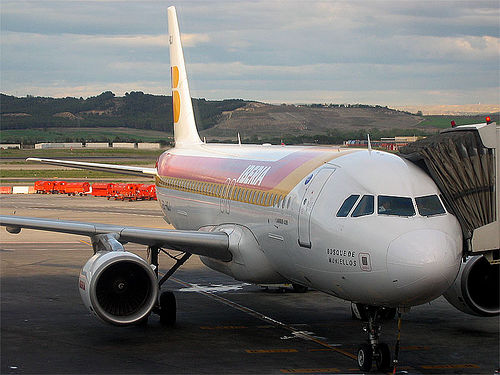

In [15]:
target_img = Image.open(
    '/home/data1/lkd/ECCV2022_OOD/data/ROBINv1.1-cls/ROBINv1.1/train/Images/aeroplane/2008_000585.jpg').convert('RGB')
target_img

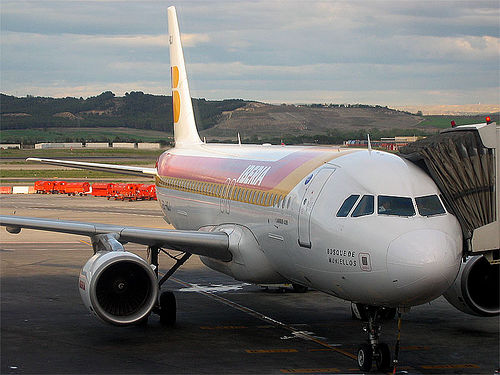

In [13]:
img